In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("EV_Table.csv")

In [95]:
df_wa = df[df['State'] == 'WA'].copy() # Ensure column name matches your dataset


In [97]:
print(df_wa.head())  # View first few rows
print(df_wa.shape)  # Check number of rows and columns
print(df_wa["State"].unique())  

      County          City State  Model Year Manufacturer     Model  \
0     Kitsap       Poulsbo    WA        2023         JEEP  WRANGLER   
1  Snohomish  Lake Stevens    WA        2019    CHEVROLET   BOLT EV   
2       King       Seattle    WA        2015          BMW        I3   
3       King       Seattle    WA        2019        TESLA   MODEL 3   
4     Yakima         Selah    WA        2015        TESLA   MODEL S   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  
0             Not eligible due to low battery range  
1           Clean Alternative Fuel Vehicle Eligible  
2           Clean Alternative Fuel Vehicle Eligible  
3           Clean Alternative Fuel Vehicle Eligible  
4           Clean Alternative Fu

In [99]:
print(df_wa["State"].unique()) 

['WA']


In [101]:
df_wa['Model Year'].value_counts().sort_index()

Model Year
1999        2
2000        7
2002        2
2003        1
2008       23
2010       23
2011      692
2012     1510
2013     4251
2014     3394
2015     4664
2016     5346
2017     8410
2018    14109
2019    10851
2020    12070
2021    20214
2022    28521
2023    58943
2024    45477
Name: count, dtype: int64

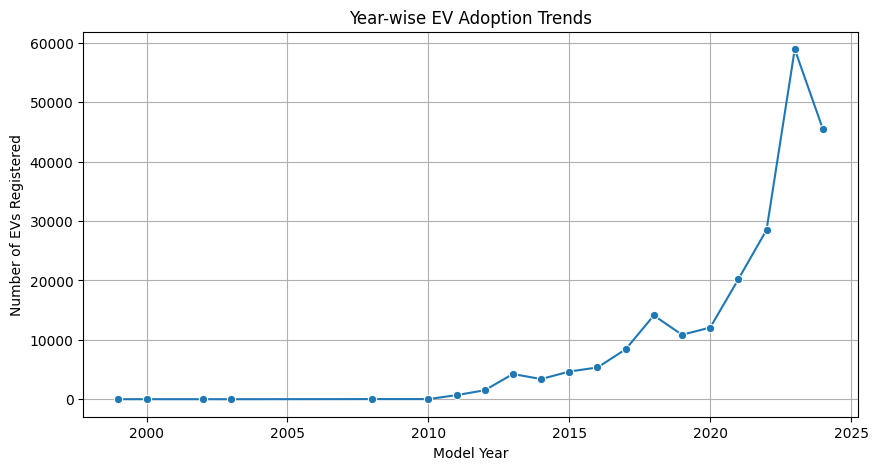

In [103]:
df_wa['Model Year'] = pd.to_numeric(df_wa['Model Year'], errors='coerce')
yearly_adoption = df_wa.groupby('Model Year').size()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_adoption.index, y=yearly_adoption.values, marker='o')
plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")
plt.title("Year-wise EV Adoption Trends")
plt.grid(True)
plt.show()

In [85]:
# Count occurrences of manufacturers
top_manufacturers = df_wa["Manufacturer"].value_counts().head(10)
print(top_manufacturers)

Manufacturer
TESLA         93997
CHEVROLET     16252
NISSAN        14970
FORD          11893
KIA           10452
TOYOTA         8920
BMW            8573
HYUNDAI        6743
JEEP           5751
VOLKSWAGEN     5720
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

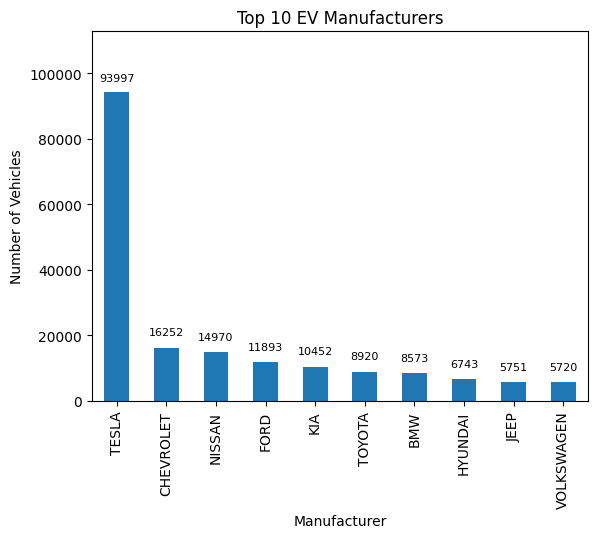

In [77]:
df['Manufacturer'].value_counts().head(10).plot(kind='bar')

# Increase the y-axis limit to add extra space
plt.ylim(0, top_manufacturers.max() * 1.2)  # Extends the upper limit by 20%

# Add data labels
for i, value in enumerate(top_manufacturers):
    plt.text(i, value + (top_manufacturers.max() * 0.04),  # 5% extra space
             str(value), ha='center', fontsize=8)

plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 EV Manufacturers')
plt.show

In [109]:
cafv_counts = df_wa["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
print(cafv_counts)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    126489
Clean Alternative Fuel Vehicle Eligible                          70129
Not eligible due to low battery range                            21892
Name: count, dtype: int64


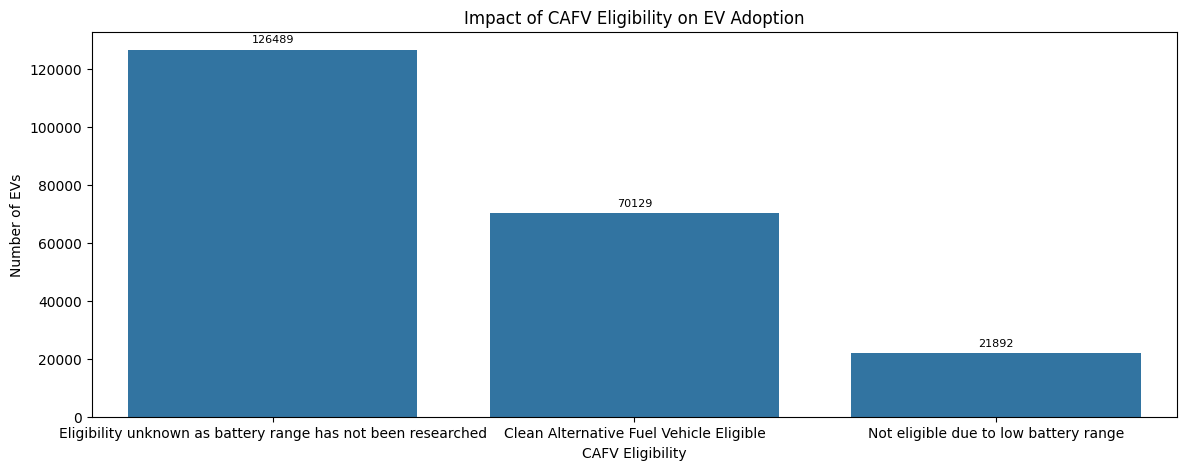

In [159]:
# Plot the distribution
plt.figure(figsize=(14,5))
sns.barplot(x=cafv_counts.index, y=cafv_counts.values)
# Add data labels
for i, value in enumerate(cafv_counts):
    plt.text(i, value + (cafv_counts.max() * 0.02),  # 5% extra space
             str(value), ha='center', fontsize=8)
plt.xlabel("CAFV Eligibility")
plt.ylabel("Number of EVs")
plt.title("Impact of CAFV Eligibility on EV Adoption")
plt.xticks(rotation=360)
plt.show()

In [163]:
ev_counts = df_wa['County'].value_counts()
print(ev_counts)

County
King            110476
Snohomish        26548
Pierce           17599
Clark            13168
Thurston          8081
Kitsap            7335
Spokane           6173
Whatcom           5348
Benton            2829
Skagit            2473
Island            2357
Yakima            1384
Clallam           1331
Chelan            1329
Jefferson         1161
Cowlitz           1137
San Juan          1079
Mason             1042
Lewis             1003
Grant              810
Franklin           808
Kittitas           807
Grays Harbor       805
Walla Walla        589
Douglas            476
Whitman            428
Klickitat          384
Okanogan           338
Pacific            273
Stevens            267
Skamania           233
Asotin              89
Wahkiakum           77
Pend Oreille        76
Adams               76
Lincoln             67
Ferry               34
Columbia            17
Garfield             3
Name: count, dtype: int64


In [167]:
ev_counts = df_wa['City'].value_counts()
print(ev_counts)

City
Seattle      34848
Bellevue     10680
Vancouver     7919
Redmond       7582
Bothell       7111
             ...  
Washtucna        1
Gardiner         1
Orient           1
Albion           1
Appleton         1
Name: count, Length: 484, dtype: int64


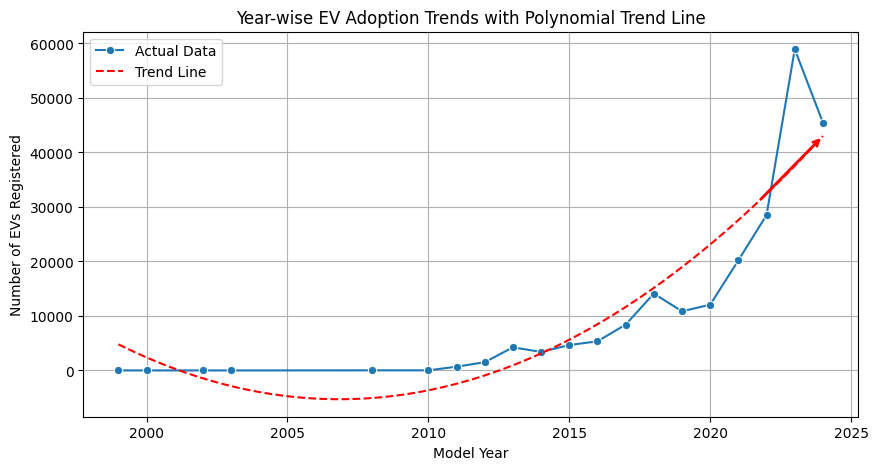

In [177]:
df_wa['Model Year'] = pd.to_numeric(df_wa['Model Year'], errors='coerce')

# Group data by year
yearly_adoption = df_wa.groupby('Model Year').size().reset_index(name='EV Count')

# Fit a polynomial curve (2nd-degree polynomial for better fitting)
z = np.polyfit(yearly_adoption['Model Year'], yearly_adoption['EV Count'], 2)
p = np.poly1d(z)

# Generate x values for the trendline
trend_x = np.linspace(yearly_adoption['Model Year'].min(), yearly_adoption['Model Year'].max(), 100)
trend_y = p(trend_x)

# Plot the data
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_adoption['Model Year'], y=yearly_adoption['EV Count'], marker='o', label="Actual Data")

# Add the polynomial trendline
plt.plot(trend_x, trend_y, color='red', linestyle='dashed', label="Trend Line")

# Add an arrow at the end of the trend line
plt.annotate('', 
             xy=(trend_x[-1], trend_y[-1]),  # Arrowhead position (end of trendline)
             xytext=(trend_x[-10], trend_y[-10]),  # Arrow tail position
             arrowprops=dict(arrowstyle='->', color='red', lw=2))

plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")
plt.title("Year-wise EV Adoption Trends with Polynomial Trend Line")
plt.legend()
plt.grid(True)
plt.show()